In [1]:
import numpy as np

### Import Signal 和 Array

`signal.py`定义了一些常用的信号类型，信号对应的 Class 都继承自`Signal`基类, 用于产生多个入射信号  
`array.py`定义了一些常用的阵列结构，所有的阵列对应的 Class 都继承自`Array`基类，`Array`会使用`Signal`产生的信号以及入射角度，根据阵列接受信号的数学模型生成阵列接受信号的仿真数据


In [2]:
from classical_doa.arrays import UniformCircularArray
from classical_doa.signals import ComplexStochasticSignal

### 设定仿真参数

设定与阵列结构以及信号参数、入射方向有关的仿真参数，产生采样后的阵列接受信号  
均匀圆阵的 DOA 估计一般采用基于波束空间(Beam Space)分解的方法，波束空间分解利用了一阶贝塞尔函数的性质，所以阵列设置需要满足$M > 2 \left \lfloor \frac{2\pi}{\lambda} r \right \rfloor$


In [3]:
# 信号参数
num_snapshots = 300
signal_fre = 3e8
fs = 7e8
snr = 10

# 阵列参数
num_antennas = 15
antenna_radius = 2 * (3e8 / signal_fre)  # 阵元半径一倍波长

# 入射角度
angle_incidence = np.array([[30, -100, 90], [30, 30, 60]])
num_signal = angle_incidence.shape[1]

### 生成仿真信号

创建`Array`和`Signal`的实例，并生成阵列接受信号的仿真数据


In [4]:
# 创建信号实例
signal = ComplexStochasticSignal(nsamples=num_snapshots, fre=signal_fre, fs=fs)

# 创建阵列实例
array = UniformCircularArray(m=num_antennas, r=antenna_radius)

# 使用信号和阵列生成仿真数据
received_data = array.received_signal(
    signal=signal, snr=snr, angle_incidence=angle_incidence, unit="deg"
)

### 估计入射角

`algorithm`中定义了几种经典的 DOA 估计算法，有些算法会输出空间谱，有些算法会直接输出估计的入射角的值  
首先 import 两个和绘图函数，分别用于展示这两种算法的估计结果


In [5]:
from classical_doa.plot import plot_estimated_value_2d, plot_spatial_spectrum_2d

#### UCA-RB-MUSIC 算法


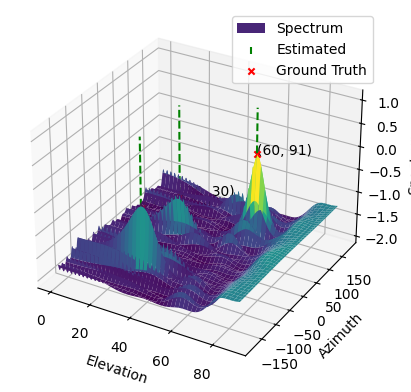

In [6]:
from classical_doa.algorithm import uca_rb_music

azimuth_grids = np.arange(-180, 180, 1)
elevation_grids = np.arange(0, 90, 1)

spectrum = uca_rb_music(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    azimuth_grids=azimuth_grids,
    elevation_grids=elevation_grids,
    unit="deg",
)

# 绘制空间谱
plot_spatial_spectrum_2d(
    spectrum=spectrum,
    ground_truth=angle_incidence,
    azimuth_grids=azimuth_grids,
    elevation_grids=elevation_grids,
)

#### UCA-ESPRIT 算法


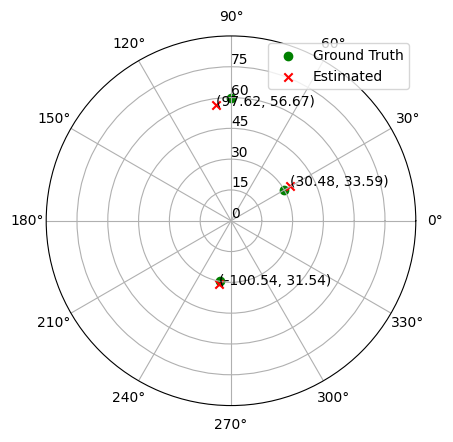

In [7]:
from classical_doa.algorithm import uca_esprit

estimated_azimuth, estimated_elevation = uca_esprit(
    received_data=received_data,
    num_signal=num_signal,
    array=array,
    signal_fre=signal_fre,
    unit="deg",
)

plot_estimated_value_2d(
    estimated_azimuth=estimated_azimuth,
    estimated_elevation=estimated_elevation,
    ground_truth=angle_incidence,
    unit="deg",
)